# Datacleaning

Tre huvudsakliga steg
1. ***Importera data*** från datakälla, antingen från en källa eller från olika datakällor och slår ihop dom.
2. ***Filtrerar data*** på olika sätt. T.ex. query för att få ut enbart "volvo" bilar etc. Få fram enbart den data man är intresserad av.
3. ***Cleaning***: Hitta dubletter, hantera avsaknad av data, hantera felaktiga datatyper, ologiska värden.
"Resultat i ML aldrig bättre än datat man skickar in", "Garbage in, garbage out"

I många fall behöver man hitta data själv från olika källor. Dessa kan skilja sig ifrån varandra på olika sätt, ha dubletter och liknande.
Viktigt arbete att få till högkvalitativt data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


### Missing data
Missing data occurs when values are simply absent or containt NaN (not a number) for any feature(column)(interchangeable in pandas also such as row/index) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization 
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- ***Remove*** rows or columns containing missing data
- ***Impute with mean*** or median (t.ex. ålder saknas så fyller man i med medel eller medianvärde för resterande åldrar). Done mostly with numerics
- ***Impute with mode*** (most frequently occuring feature). Done mostly with categorical data. 
- ***Impute with forward or backward fill*** (fyller luckan med det senast ifyllda, antingen uppifrån eller nedifrån)
- ***Interpolate*** data between two points. T.ex. värden:
4,6,8,4,-,-,12, så sprider man ut det jämnt emellan 4 och 12.

****Note: Domain knowledge is often needed to decide how to fill nulls.***
The method is chosen depending on how the data is to be interpreted. Often some expert on the data is asked, not always we decide. E.g. data on MRI scans, we have to ask some expert on how to decide and then techniqally handle nulls according to this.



In [2]:
# Skapar en pandas dataframe

df = pd.DataFrame(np.random.randn(10,4), columns = ["A", "B", "C", "D"])

df = df[df>0]  
# Behåller alla värden som är större än noll, och tar bort de som inte är det
# Då får man missing values NaN (not a number, ett sätt i pandas att representera missing value)

df


,A,B,C,D
0,NaN,NaN,1.953224,NaN
1,NaN,0.277888,0.726338,0.091978
2,NaN,2.418621,1.316239,0.808053
3,NaN,0.123206,1.858922,0.372778
4,2.082364,0.103517,NaN,NaN
5,NaN,1.939447,NaN,1.161455
6,1.093365,1.094233,NaN,1.424895
7,NaN,NaN,0.318467,NaN
8,NaN,1.029157,0.811472,NaN
9,NaN,NaN,NaN,0.794504


In [3]:
copy = df.copy()

# Nu har vi kopierat datasetet
# Anta att "D" har för många NaN och vi vill ta bort den:
copy.drop(columns = "D", inplace = True)    # inplace = True sparar värdet i copy

copy

,A,B,C
0,NaN,NaN,1.953224
1,NaN,0.277888,0.726338
2,NaN,2.418621,1.316239
3,NaN,0.123206,1.858922
4,2.082364,0.103517,NaN
5,NaN,1.939447,NaN
6,1.093365,1.094233,NaN
7,NaN,NaN,0.318467
8,NaN,1.029157,0.811472
9,NaN,NaN,NaN


## dropna
Remove rows (default), or columns, containing null.

**Parameters**
- **how** = "any" (default) or "all"
- **thresh** = set number of (non-missing) values a row must contain in order to *not* drop
- **subset** only look for Nan in subset of columns (or rows)
- **axis** = "index"/rows (default) or "columns"

In [4]:
copy.isna() # saknade värden blir True i Dataframen


,A,B,C
0,True,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True
5,True,False,True
6,False,False,True
7,True,True,False
8,True,False,False
9,True,True,True


In [5]:
copy.dropna()    # Kollar på rader per default och tar bort alla rader som innehåller en NaN
copy.dropna(how="all")  #How = "all" tar bort rader då alla värden är non. Default är any, då tas de bort även om enbart ett värde är NaN på raden
copy.dropna(thresh = 3)    # bestämmer hur många värden (ej NaN) som måste finnas för att de ska vara kvar - så tre kolumner med tre värden.
copy.dropna(subset = "C") # Droppar enbart rader som har NaN i C
copy.dropna(subset = ["A", "C"])  # Droppar rader med NaN i flera kolumner  via lista
copy.dropna(axis = "columns", subset = 2) # Default är per rad, men axis = "columns" gör att man går kolumnvis och tar bort kolumner som innehåller NaN överhuvudtaget
# Även här kan thresh(hold) användas för att ange antal värden som kolumnen kan ha för att bli kvar.
# subset = 2 i detta sammanhang: kolumner med NaN på rad med index 2 tas bort


,B,C
0,NaN,1.953224
1,0.277888,0.726338
2,2.418621,1.316239
3,0.123206,1.858922
4,0.103517,NaN
5,1.939447,NaN
6,1.094233,NaN
7,NaN,0.318467
8,1.029157,0.811472
9,NaN,NaN


### fillna
Fill missing values
- Fylla i värden istället för att ta bort NaN


In [6]:
copy = df.copy()
copy.fillna(0) 

# Man kan vilja sätta alla värden till något typ 0
# Men vanligast är att ange mean/median

copy["A"].mean()  # Mean för allt i kolumn A
copy["A"].fillna(copy["A"].mean(), inplace =True)  # Här fyller man NaN värden i kolumn A med mean. Med inplace = TRue uppdateras själva copy också, annars körs den bara
copy["A"] # Nu kan man se att tidigare NaN värden har mean ifyllt

copy["B"].mode()      # Visar mode (most frequently occuring value, show all values if no such exits)
copy["B"].mode()[2]   # Output mode in index 2 (mods are showed sorted in ascending order). Therefore mainly for categorical data 

copy["B"].ffill(inplace = True)    # Forward fill, fyller NaN framåt med senaste värdet uppifrån ned
copy["D"].bfill(inplace = True)    # Som forward fill fast nedifrån upp
# Om första värdet är NaN, så kommer inte forward fill fylla i detta
# Då kan man göra backward fill efter forward fillen

copy["C"].interpolate(inplace = True)          #Interpolate - fyller med NaN med jämna värden mittemellan innan och efter värden
copy
# Ofta vill man fylla internt i kolumner, alltså inte ta metod i alla kolumners värden




,A,B,C,D
0,1.587864,NaN,1.953224,0.091978
1,1.587864,0.277888,0.726338,0.091978
2,1.587864,2.418621,1.316239,0.808053
3,1.587864,0.123206,1.858922,0.372778
4,2.082364,0.103517,1.473808,1.161455
5,1.587864,1.939447,1.088694,1.161455
6,1.093365,1.094233,0.703581,1.424895
7,1.587864,1.094233,0.318467,0.794504
8,1.587864,1.029157,0.811472,0.794504
9,1.587864,1.029157,0.811472,0.794504


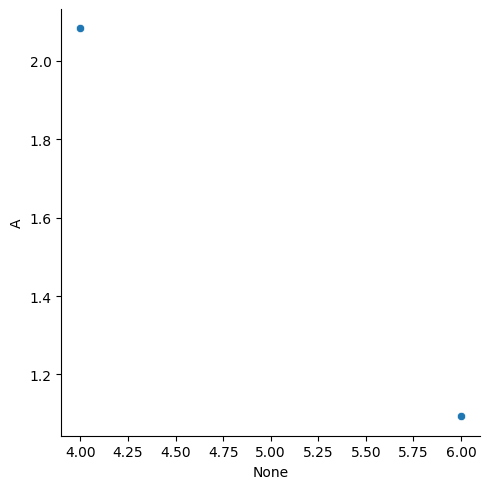

In [7]:
copy = df.copy()
copy.fillna(3333) # Fyller i samtliga kolumner
# Vill man fylla från ett visst index till annat, kan man göra fillna på en loc / iloc osv.

sns.relplot(x=copy.index, y="A", data = copy)

In [12]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()   # Skapar ny kolumn "is NA" där värdet blir true om raden i kolumn "A" har ett NaN värde
copy

,A,B,C,D,is NA
0,NaN,NaN,1.953224,NaN,True
1,NaN,0.277888,0.726338,0.091978,True
2,NaN,2.418621,1.316239,0.808053,True
3,NaN,0.123206,1.858922,0.372778,True
4,2.082364,0.103517,NaN,NaN,False
5,NaN,1.939447,NaN,1.161455,True
6,1.093365,1.094233,NaN,1.424895,False
7,NaN,NaN,0.318467,NaN,True
8,NaN,1.029157,0.811472,NaN,True
9,NaN,NaN,NaN,0.794504,True


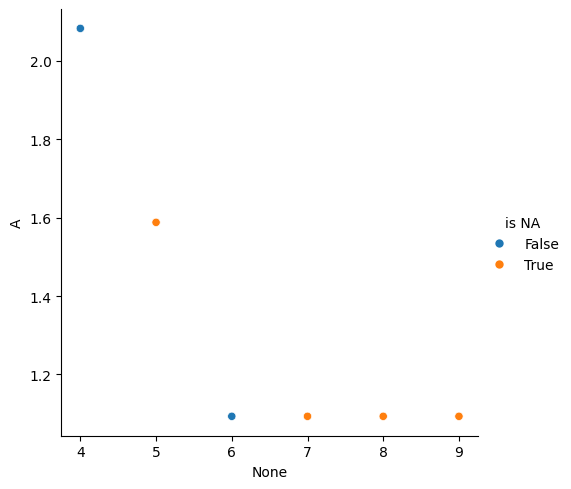

In [13]:
# Nu finns bara 3 värden i kolumn A som inte är NaN
# För att få resterande värden i plotten
# kan man interpolate. 
# Se då hur dessa värden sprids
# jämnt längs en linje mellan punkterna

copy["A"].interpolate(inplace = True)    # Här ser du hur den fyller emellan värden i grafen
# copy["A"].ffill(inplace = True)    # se i grafen hur den fyller samma värde efter punkten
# copy["A"].bfill(inplace = True)    # se i grafen hur den fyller samma värde innan punkten
sns.relplot(x=copy.index, y="A", hue = "is NA", data = copy)



# Summering
Alltså i princip ***2 metoder*** i Pandas ***dropna*** för att ta bort kolumner/rader med NaN eller ***fillna*** för att fylla i på olika sätt.